In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
dataset = pd.read_csv(dataset_path)

x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

y_train = x_train.pop('Outcome')
y_test = x_test.pop('Outcome')

In [3]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [4]:
y_train.value_counts() # Binary classification

0    347
1    191
Name: Outcome, dtype: int64

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [0]:
model = Sequential()
model.add(Dense(256,activation='relu', input_shape=[x_train.shape[1]])) # first hidden layer
model.add(Dense(128,activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(Dense(64,activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0)
history = model.fit(x_train, y_train, 
                    epochs = 100, 
                    validation_split=0.3,
                    callbacks = [earlystopping])

Epoch 1/100
12/12 [==============================] - 0s 19ms/step - loss: 0.9144 - accuracy: 0.6303 - val_loss: 0.8657 - val_accuracy: 0.6111
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8443 - accuracy: 0.6596 - val_loss: 0.8128 - val_accuracy: 0.6111
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7904 - accuracy: 0.6622 - val_loss: 0.7592 - val_accuracy: 0.6173
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7363 - accuracy: 0.6809 - val_loss: 0.7147 - val_accuracy: 0.6481
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.7021 - val_loss: 0.6680 - val_accuracy: 0.6543
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.7074 - val_loss: 0.6427 - val_accuracy: 0.7099
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6369 - accuracy: 0.7128 - val_loss: 0.6175 - val_accuracy: 0.7407
Epoch 8/100


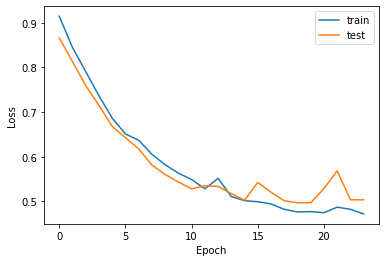

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

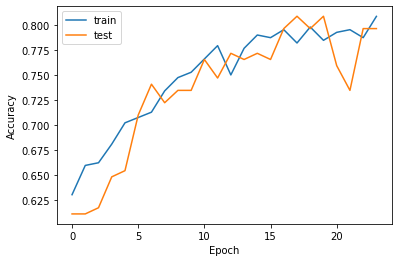

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='train')
plt.plot(epoch,val_acc,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.7304


[0.6111798286437988, 0.730434775352478]

In [0]:
probs = model.predict(x_test)

In [14]:
probs[:10]

array([[0.02996477],
       [0.8505862 ],
       [0.18849751],
       [0.1901626 ],
       [0.5862548 ],
       [0.42529038],
       [0.23325998],
       [0.04017717],
       [0.04343155],
       [0.6203817 ]], dtype=float32)

In [16]:
probs.flatten().round().astype(int)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0])